# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [101]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [71]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [72]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [73]:
sensor.isna().sum()



attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [74]:
sensor.shape
'''1751 rows and 12 columns'''

'1751 rows and 12 columns'

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [75]:
start_date = '2018-01-01 00:00:00'
end_date = '2018-01-01 00:29:10'
n_rows = len(sensor)
time_series_index = pd.date_range(start=start_date, end=end_date, periods=n_rows)


Assign the time series index to the dataframe's index.

In [76]:
sensor.index = time_series_index
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

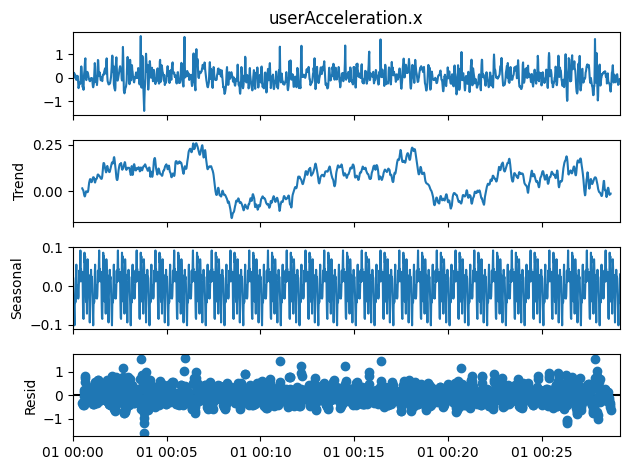

In [77]:
dec_accelar_x = seasonal_decompose(sensor['userAcceleration.x'],period = 60)
dec_accelar_x.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

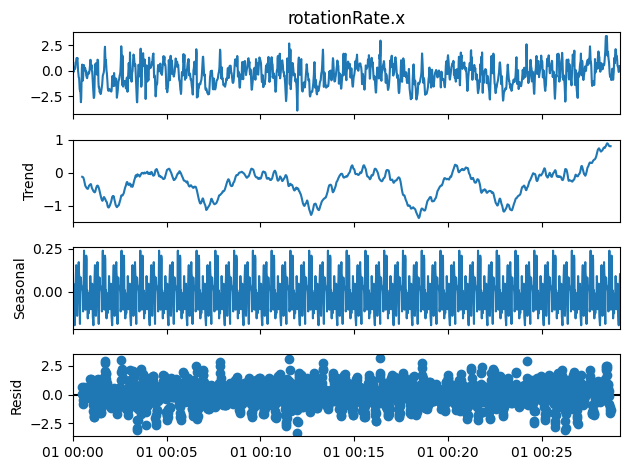

In [78]:
dec_rotation_x = seasonal_decompose(sensor['rotationRate.x'],period = 60)
dec_rotation_x.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

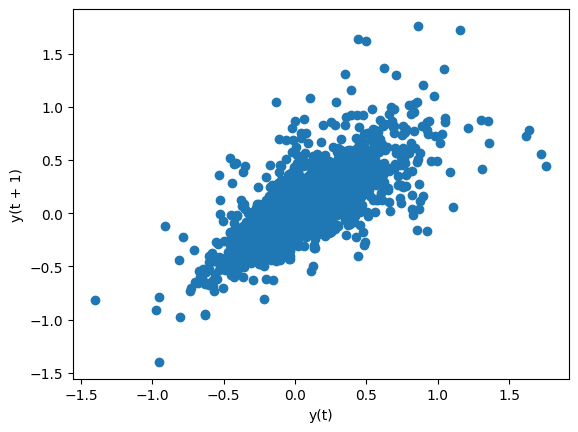

In [79]:
pd.plotting.lag_plot(sensor['userAcceleration.x'], lag=1);

Create a lag plot for `rotationRate.x`

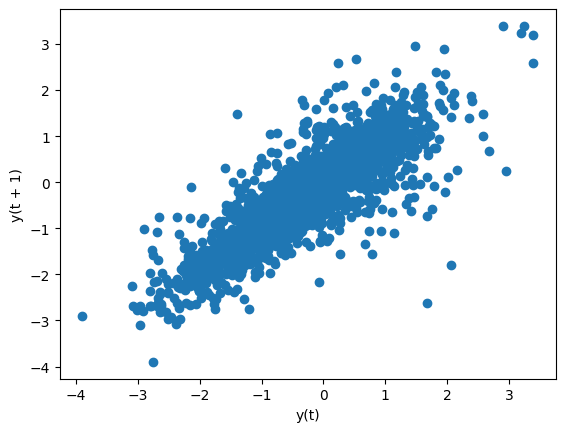

In [80]:
pd.plotting.lag_plot(sensor['rotationRate.x'], lag=1);

What are your conclusions from both visualizations?

In [81]:
'''although not perfect a correlation between data separated by one lag. Correlation is clearly higher for rotationRate.x '''

'although not perfect a correlation between data separated by one lag. Correlation is clearly higher for rotationRate.x '

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [82]:
DF_accelar_x = adfuller(sensor['userAcceleration.x'])
"""
# p_value > 0.05 -> dont reject  -> keep H0 -> NOT stationary
# p_value < 0.05 -> reject H0
"""
DF_accelar_x

(-17.95799408616976,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [83]:
'''as p_value = 2.8 e-30 so <0.5  we have to reject  HO so THERE IS STATIONALITY'''

'as p_value = 2.8 e-30 so <0.5  we have to reject  HO so THERE IS STATIONALITY'

In [84]:
DF_rotation_x = adfuller(sensor['rotationRate.x'])
"""
# p_value > 0.05 -> dont reject  -> keep H0 -> NOT stationary
# p_value < 0.05 -> reject H0
"""
DF_rotation_x

(-5.269860625086422,
 6.320230335912189e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

In [85]:
'''as p_value = 6.3 e-6 so <0.5  we have to reject  HO so THERE IS STATIONALITY'''

'as p_value = 6.3 e-6 so <0.5  we have to reject  HO so THERE IS STATIONALITY'

What are your conclusions from this test?

In [86]:
## as said previously both tests get as a result the rejection of H0 and indicate that THERE IS STATIONALITY

## Bonus: Challenge 2

Finally, we'll create an ARIMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 0, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [87]:
sensor.sample()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:14:54,1.018084,-0.651297,-2.490721,0.676881,0.606218,-0.41753,-1.29186,1.64585,-0.513768,-0.207475,-0.192171,0.116901


In [88]:
sensor.shape

(1751, 12)

In [89]:
sensor.index.freq = pd.infer_freq(sensor.index) 

In [90]:
sensor.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

In [91]:
# 0. Splitting into train & test
# Use the last 10 observations as the test set and all other observations as the training set.
y_train = sensor["userAcceleration.x"][:-10]
y_test = sensor["userAcceleration.x"][-11:]


In [92]:
# 1. Create an instance of the ARIMA model that takes y_train, the order, and freq="S"
# Docs: https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html

model = ARIMA(y_train, order = (2, 0, 1), freq="S")

In [95]:
# 2. Fit the model:

model = model.fit()

In [96]:
# 3. Predict: create y_pred:
sensor["forecast_accel_x"] = model.predict(start=len(sensor["userAcceleration.x"])-1000, end=len(sensor["userAcceleration.x"])+1000)
#df["forecasting_arima"] = model.predict(start=len(df["temperature"])-20, end=len(df["temperature"])-1)

In [98]:
y_pred = sensor["forecast_accel_x"]

Text(0.5, 1.0, 'measured userAcceleration.x vs predicted values ')

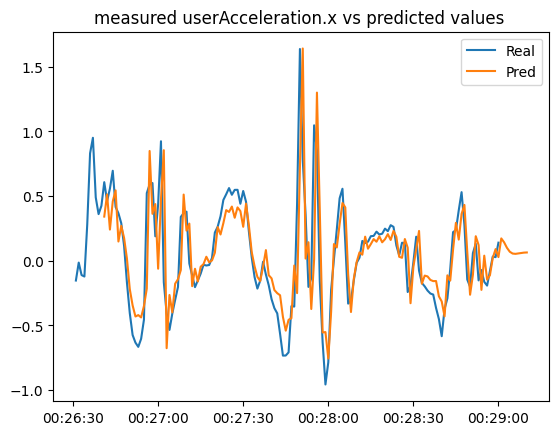

In [100]:
# 4. Visualize
plt.plot(y_train[-150:], label = "Real")
plt.plot(y_pred[-150:], label = "Pred")
plt.legend()
plt.title("measured userAcceleration.x vs predicted values ")

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [103]:
start_index = len(sensor) - 10  # Get the starting index for the last 10 rows
end_index = len(sensor) - 1  # Get the ending index for the last 10 rows

# Make predictions for the last 10 rows
predictions = sensor['forecast_accel_x'].iloc[start_index:end_index + 1]

# Extract the observed data for the last 10 rows
observed = sensor['userAcceleration.x'].iloc[start_index:end_index + 1]

# Compute the RMSE
rmse_value = rmse(predictions, observed)

print(f"Root Mean Squared Error (RMSE): {rmse_value}")

# rmse(y_pred, y_test)

Root Mean Squared Error (RMSE): 0.22529160449927885
